In [2]:
#import libraries
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

## 1.LOAD THE DATA

In [3]:
#load the data
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0

In [4]:
diabetes.shape

(15000, 10)

In [5]:
#show dataset information
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


#### CONVERT FLOAT TO INTEGERS

In [6]:
#CONVERT FLOAT TO INTEGERS
diabetes["BMI"] = diabetes["BMI"].astype(int)
diabetes["DiabetesPedigree"] = diabetes["DiabetesPedigree"].astype(int)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   PatientID               15000 non-null  int64
 1   Pregnancies             15000 non-null  int64
 2   PlasmaGlucose           15000 non-null  int64
 3   DiastolicBloodPressure  15000 non-null  int64
 4   TricepsThickness        15000 non-null  int64
 5   SerumInsulin            15000 non-null  int64
 6   BMI                     15000 non-null  int32
 7   DiabetesPedigree        15000 non-null  int32
 8   Age                     15000 non-null  int64
 9   Diabetic                15000 non-null  int64
dtypes: int32(2), int64(8)
memory usage: 1.0 MB


#### COUNT

In [7]:
#determine number with diabetes and those without
diabetes.Diabetic.value_counts()

0    10000
1     5000
Name: Diabetic, dtype: int64

In [8]:
#value count for pregnancies verses number of children
diabetes.Pregnancies.value_counts()

0     4377
1     2864
3     1219
6     1070
2      939
7      895
9      881
5      687
4      675
8      645
10     450
11     143
13      69
12      57
14      29
Name: Pregnancies, dtype: int64

## 2.Exploratory data analysis

CHECK FOR MISSING DATA

Text(0.5, 1.0, 'Missing value in the dataset')

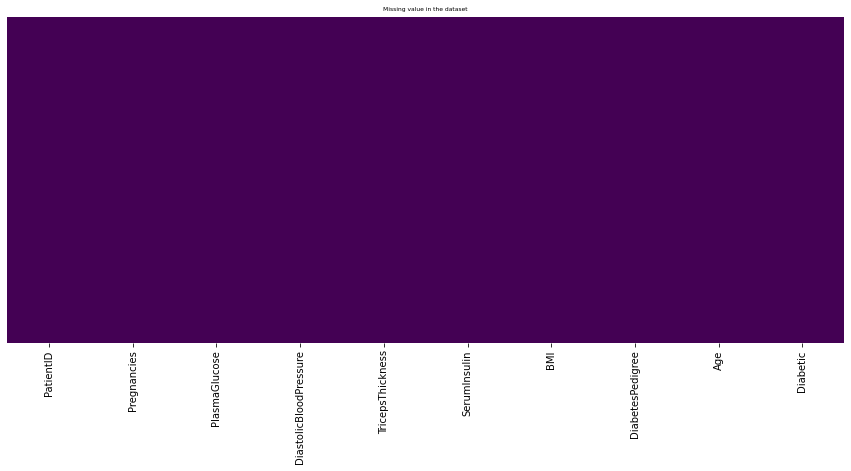

In [9]:
##Check for missing value
plt.figure(figsize=(15,6))
sns.heatmap(diabetes.isnull(),cbar=False,cmap="viridis",yticklabels=False)
plt.title('Missing value in the dataset',fontsize=6)


In [10]:
diabetes.describe()

PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.224533     107.856867               71.220667   
std    2.892534e+05      3.391020      31.981975               16.758716   
min    1.000038e+06      0.000000      44.000000               24.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               85.000000   
max    1.999997e+06     14.000000     192.000000              117.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      15000.000000  15000.000000  15000.000000      15000.000000   
mean          28.814000    137.852133     31.007733          0.080867   
std           14.555716    133.068252      9.763696          0.286472   
min            7.000000     14.000000     18.000000          0.000000   
25%           15.000000     39.000000     21.000000          0.000000   
50%           31.000000     83.000000     31.000000          0.000000   
75%           41.000000    195.000000     39.000000          0.000000   
max           93.000000    799.000000     56.000000          2.000000   

                Age      Diabetic  
count  15000.000000  15000.000000  
mean      30.137733      0.333333  
std       12.089703      0.471420  
min       21.000000      0.000000  
25%       22.000000      0.000000  
50%       24.000000      0.000000  
75%       35.000000      1.000000  
max       77.000000      1.000000

#### BINNING THE DATA

In [11]:
#binning the age,BMI,PlasmaGlucose,Pregnancies,DiastolicBloodPressure,SerumInsulin data
diabetes["Age_group"] = pd.cut(diabetes['Age'],bins = [20,35,55,80], labels = ["young_adults","middle_age","old"])
diabetes["BMI_chart"] = pd.cut(diabetes['BMI'],bins = [0,18,25,30,35,40,np.inf], labels = ["LOW", "NORMAL", "OVERWEIGHT","OBESE 1","OBESE 2","0BESE 3"])
diabetes["PlasmaGlucose_cat"] = pd.cut(diabetes['PlasmaGlucose'], bins = [0,100,125,np.inf], labels = ["good","moderate","high"])
diabetes["Pregnancies_grp"] = pd.cut(diabetes['Pregnancies'], bins = [-1,5,10,15], labels = ["0-5","6-10","11-15"])
diabetes["DiastolicBloodPressure_chart"] = pd.cut(diabetes["DiastolicBloodPressure"], bins = [0,80,89,np.inf], labels = ["Normal","Elevated","Highbloodpressure"])
diabetes["SerumInsulin_chart"] = pd.cut(diabetes["SerumInsulin"], bins = [0,70,108,145,180,np.inf], labels = ["Lowbloodsugar","Optimal","Prediabetic","Diabetic","Deadly"])

diabetes.head()

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin  BMI  DiabetesPedigree  Age  Diabetic  \
0                34            23   43                 1   21         0   
1                47            36   21                 0   23         0   
2                52            35   41                 0   23         0   
3                25           304   29                 1   43         1   
4                27            35   42                 0   22         0   

      Age_group   BMI_chart PlasmaGlucose_cat Pregnancies_grp  \
0  young_adults     0BESE 3              high             0-5   
1  young_adults      NORMAL              good            6-10   
2  young_adults     0BESE 3          moderate            6-10   
3    middle_age  OVERWEIGHT          moderate            6-10   
4  young_adults     0BESE 3              good             0-5   

  DiastolicBloodPressure_chart SerumInsulin_chart  
0                       Normal      Lowbloodsugar  
1            Highbloodpressure      Lowbloodsugar  
2                       Normal      Lowbloodsugar  
3                       Normal             Deadly  
4                       Normal      Lowbloodsugar

#### CATEGORICAL DATA

In [12]:
#categorical data plus target
categorical_data=["Age_group","BMI_chart","PlasmaGlucose_cat","DiastolicBloodPressure_chart","SerumInsulin_chart","Pregnancies_grp"]
categorical_data=diabetes.drop(columns=["PatientID","Age","TricepsThickness","BMI","PlasmaGlucose","DiastolicBloodPressure","SerumInsulin","DiabetesPedigree","Pregnancies"])
categorical_data.head(8)


Diabetic     Age_group   BMI_chart PlasmaGlucose_cat Pregnancies_grp  \
0         0  young_adults     0BESE 3              high             0-5   
1         0  young_adults      NORMAL              good            6-10   
2         0  young_adults     0BESE 3          moderate            6-10   
3         1    middle_age  OVERWEIGHT          moderate            6-10   
4         0  young_adults     0BESE 3              good             0-5   
5         0  young_adults      NORMAL              good             0-5   
6         0  young_adults      NORMAL              high             0-5   
7         0  young_adults         LOW              good             0-5   

  DiastolicBloodPressure_chart SerumInsulin_chart  
0                       Normal      Lowbloodsugar  
1            Highbloodpressure      Lowbloodsugar  
2                       Normal      Lowbloodsugar  
3                       Normal             Deadly  
4                       Normal      Lowbloodsugar  
5            Highbloodpressure             Deadly  
6                       Normal             Deadly  
7                     Elevated      Lowbloodsugar

#### CONTINOUS DATA

In [13]:
#continous data plus Diabetic as the target
diabetes_1=["Age","BMI","PlasmaGlucose","DiastolicBloodPressure","SerumInsulin","DiabetesPedigree","Pregnancies"]
diabetes_1=diabetes.drop(columns=["PatientID","Age_group","BMI_chart","PlasmaGlucose_cat","DiastolicBloodPressure_chart","SerumInsulin_chart","Pregnancies_grp"])
diabetes_1.head()

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0            0            171                      80                34   
1            8             92                      93                47   
2            7            115                      47                52   
3            9            103                      78                25   
4            1             85                      59                27   

   SerumInsulin  BMI  DiabetesPedigree  Age  Diabetic  
0            23   43                 1   21         0  
1            36   21                 0   23         0  
2            35   41                 0   23         0  
3           304   29                 1   43         1  
4            35   42                 0   22         0

#### DATA VISULIZATION

<AxesSubplot:>

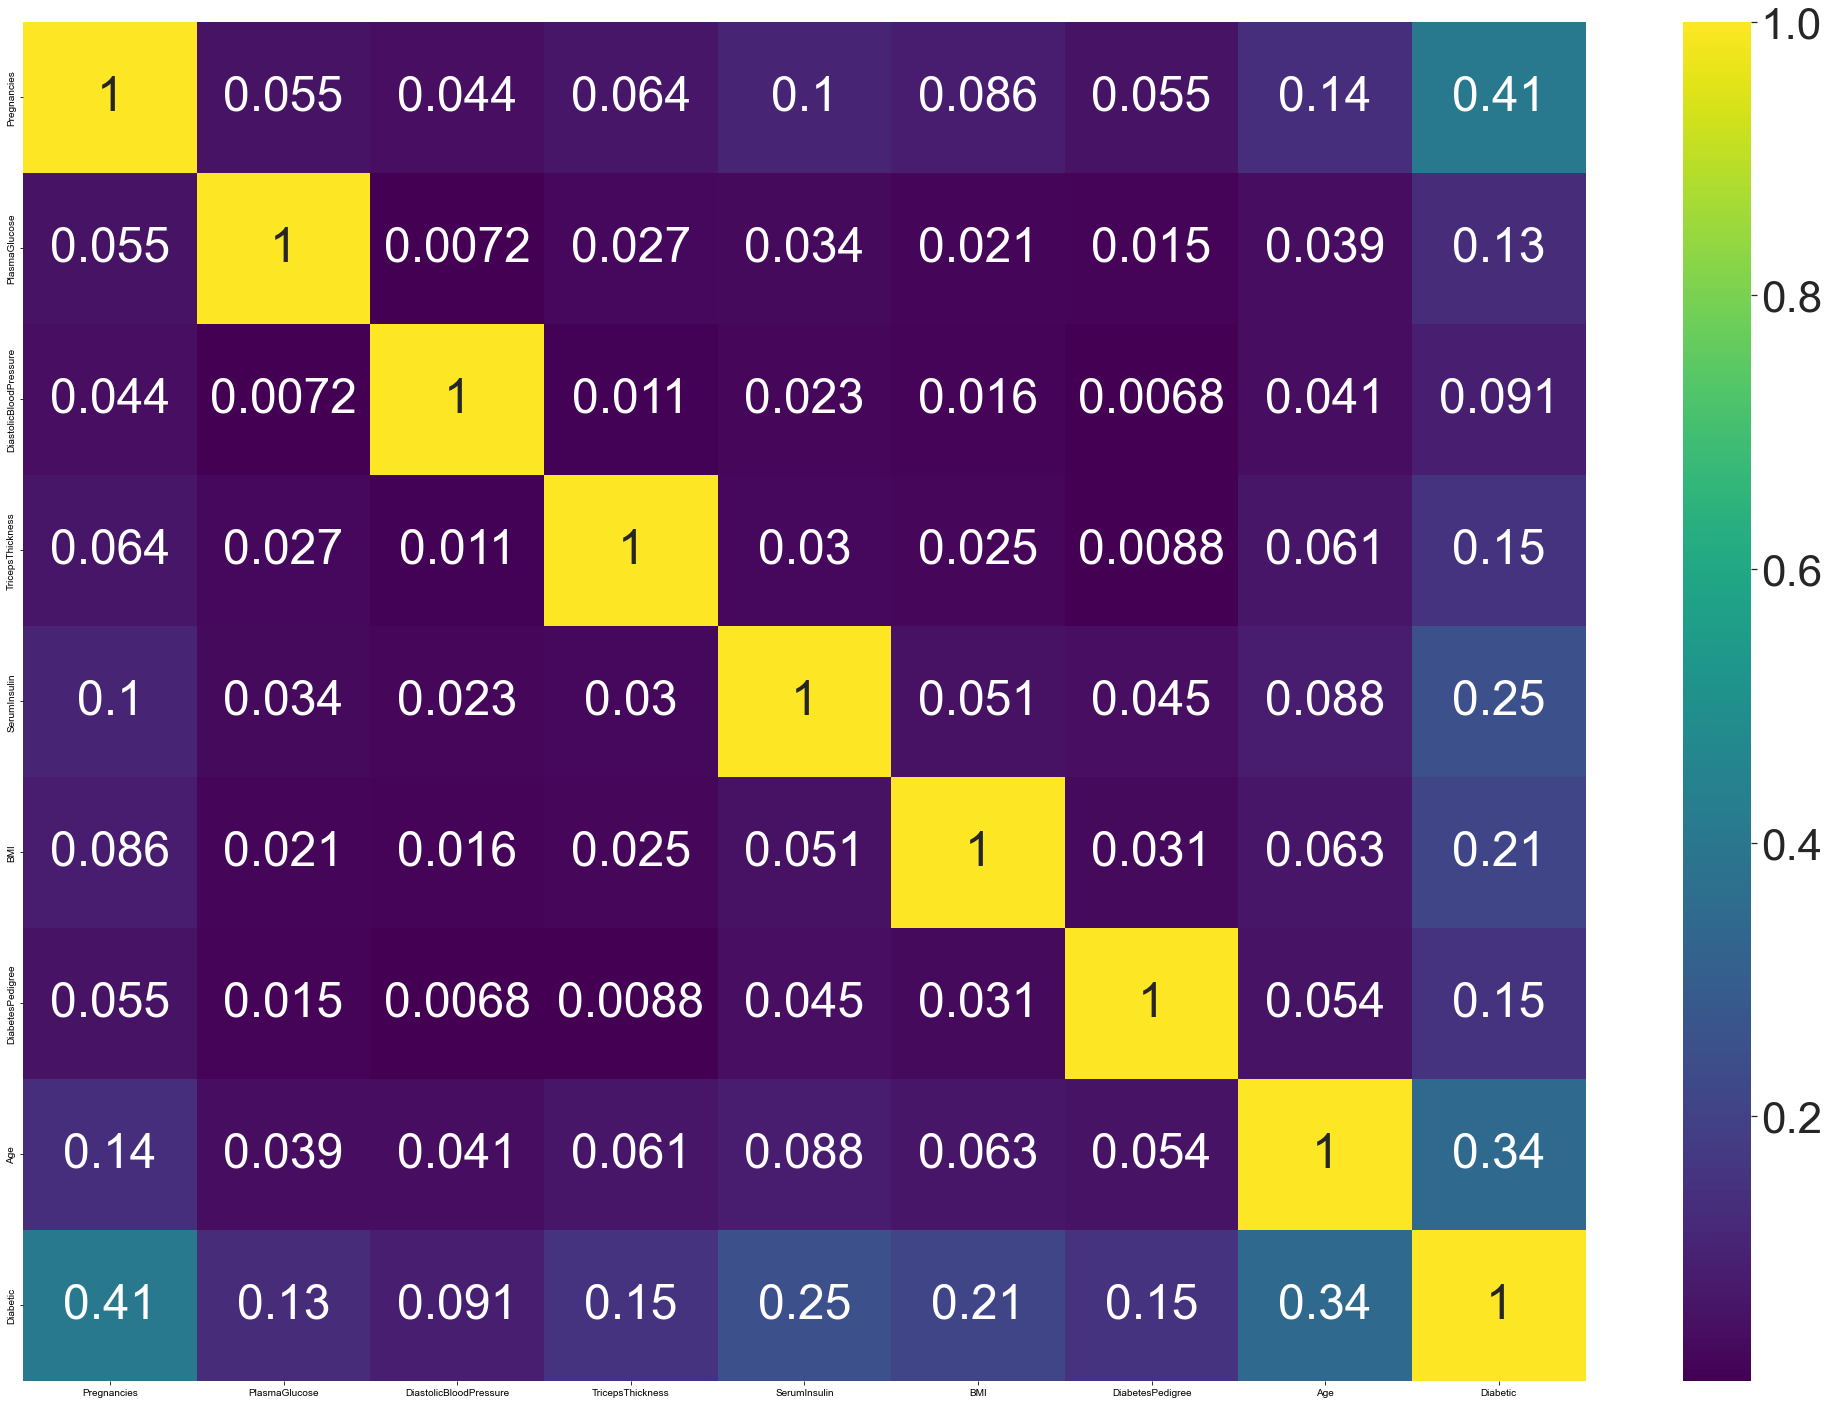

In [14]:
#A heatmap for continous data
plt.subplots(figsize=(35,25))
sns.set(font_scale=4.0)
sns.heatmap(diabetes_1.corr(),annot=True,cmap="viridis")

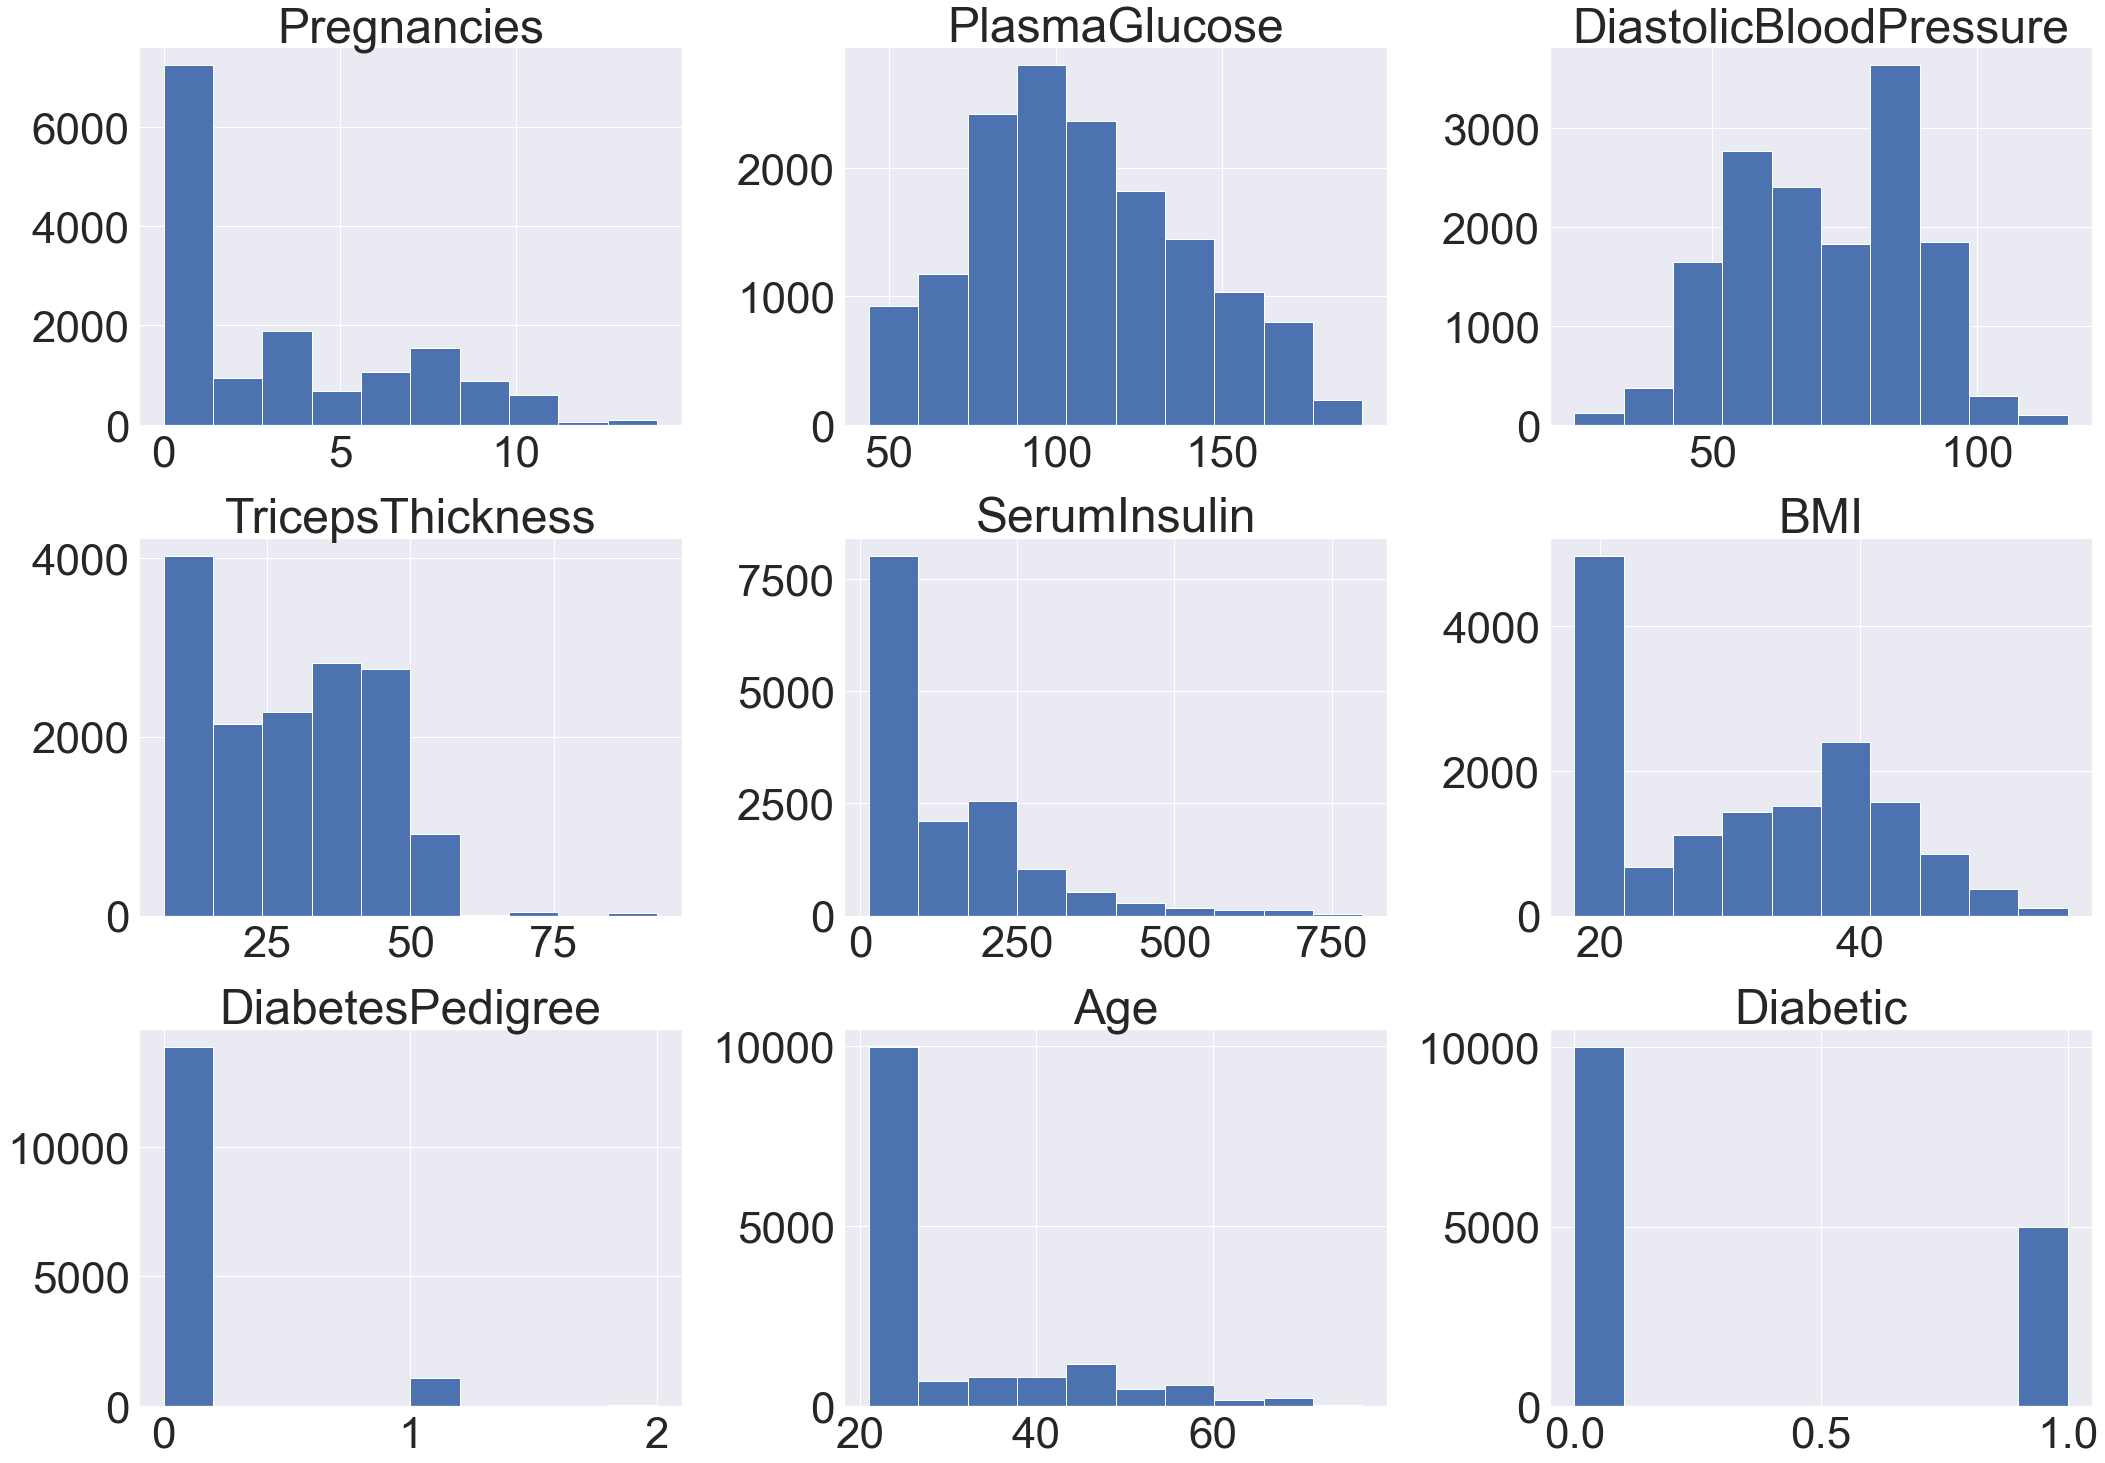

In [15]:
#histogram visualization of continous data
import matplotlib.pyplot as plt
%matplotlib inline   
import matplotlib.pyplot as plt
diabetes_1.hist(figsize=(35,25))
plt.show()

<Figure size 3960x2880 with 0 Axes>

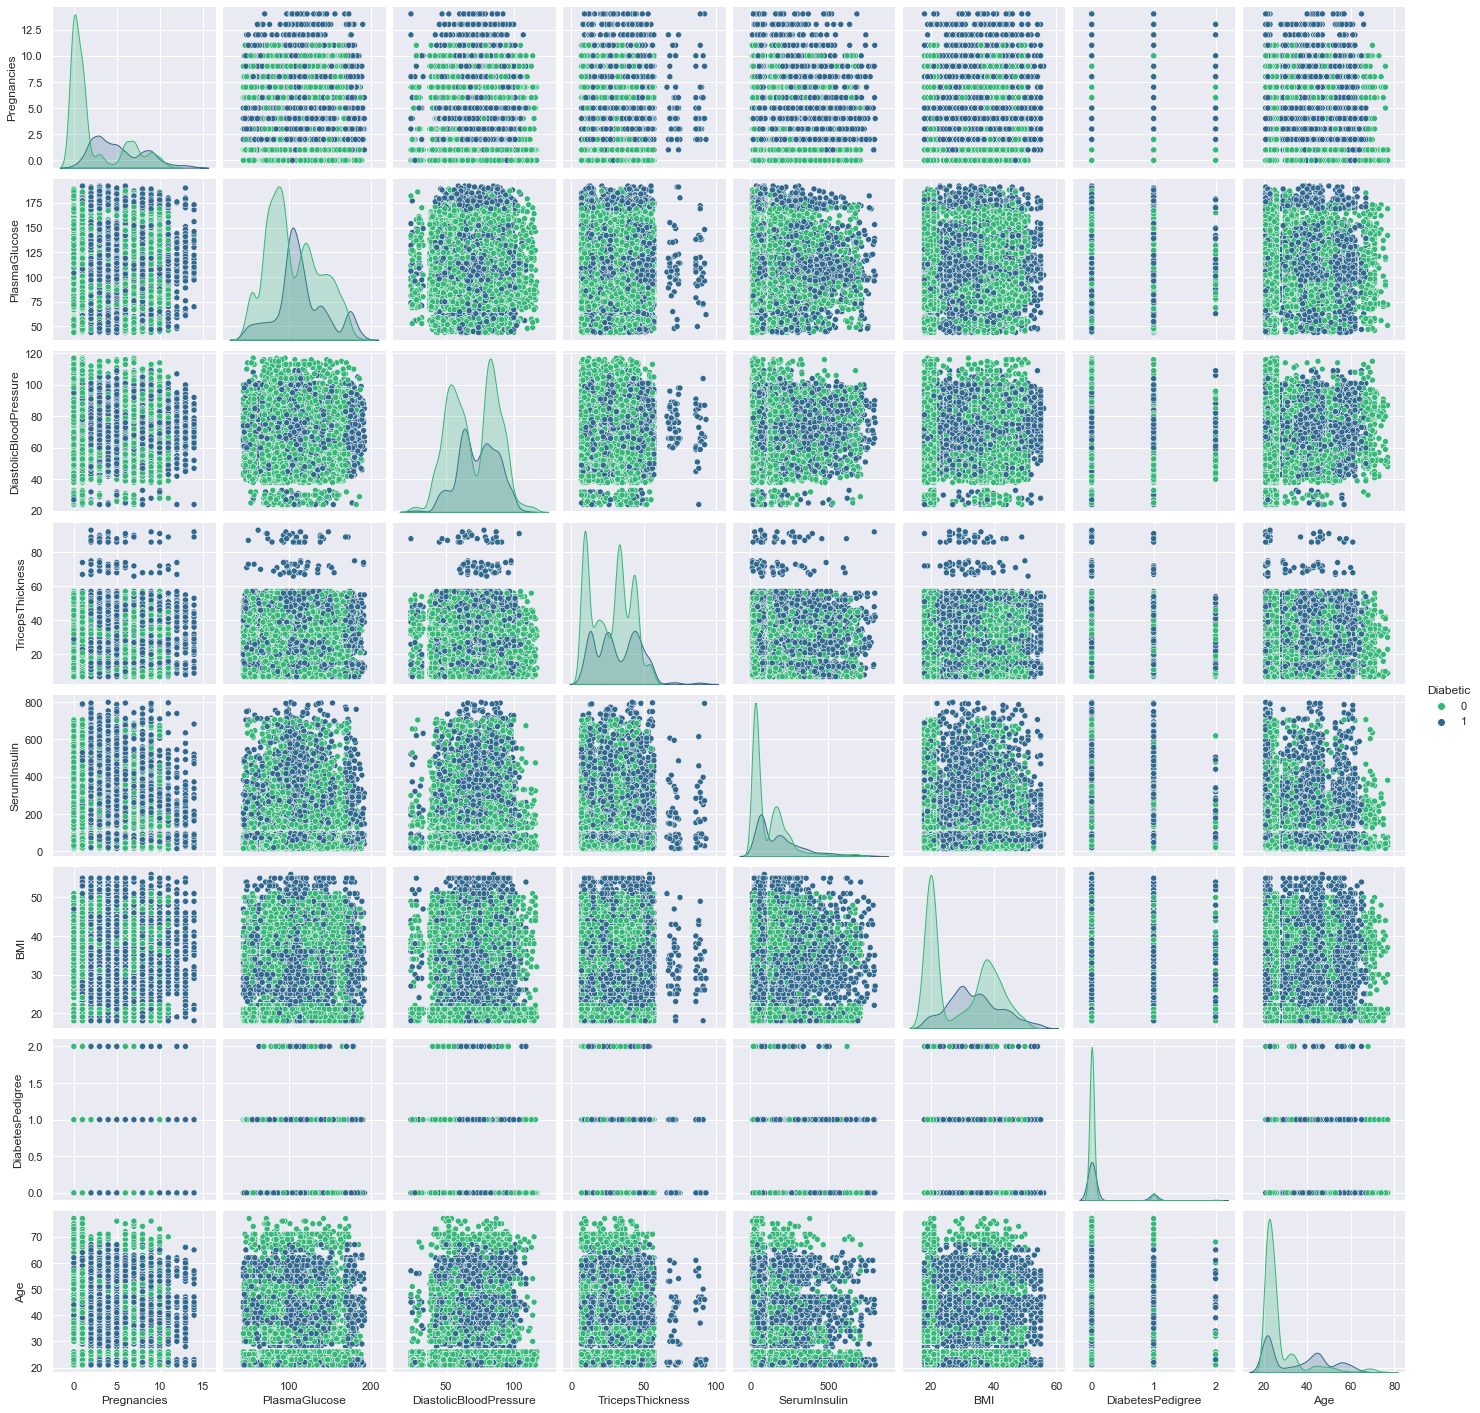

In [16]:
### scatter plot the target verses continous data
plt.figure(figsize=(55,40))
sns.set(font_scale=1.0)
sns.pairplot(diabetes_1, hue ="Diabetic",palette="viridis_r")
plt.show()

Text(0.5, 1.0, 'The relationship between Pregnancies vs Diabetic')

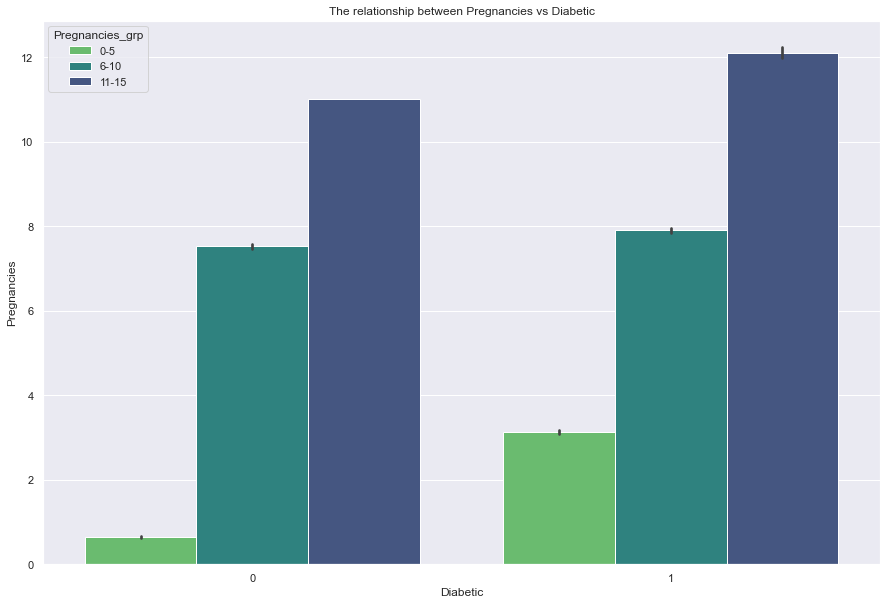

In [17]:
#data visualization of pregnancies vs Diabetic
plt.figure(figsize=(15,10))
sns.barplot(x="Diabetic", y="Pregnancies",hue="Pregnancies_grp",data=diabetes,palette="viridis_r")
plt.title("The relationship between Pregnancies vs Diabetic")

Text(0.5, 1.0, 'The relationship between the Diabetic Status and BMI Status')

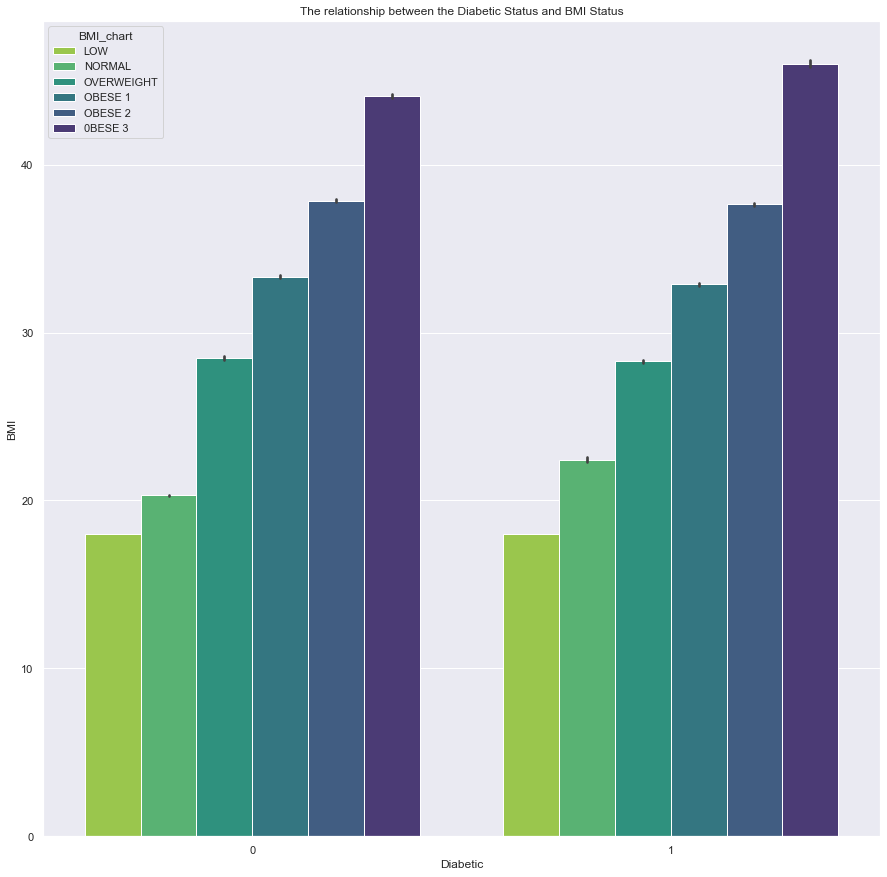

In [18]:
#data visualization of pregnancies vs Diabetic
plt.figure(figsize=(15,15))
sns.barplot(x="Diabetic", y="BMI",hue="BMI_chart",data=diabetes,palette="viridis_r")
plt.title("The relationship between the Diabetic Status and BMI Status")

Text(0.5, 1.0, 'Bar plot of SerumInsulin vs Diabetic')

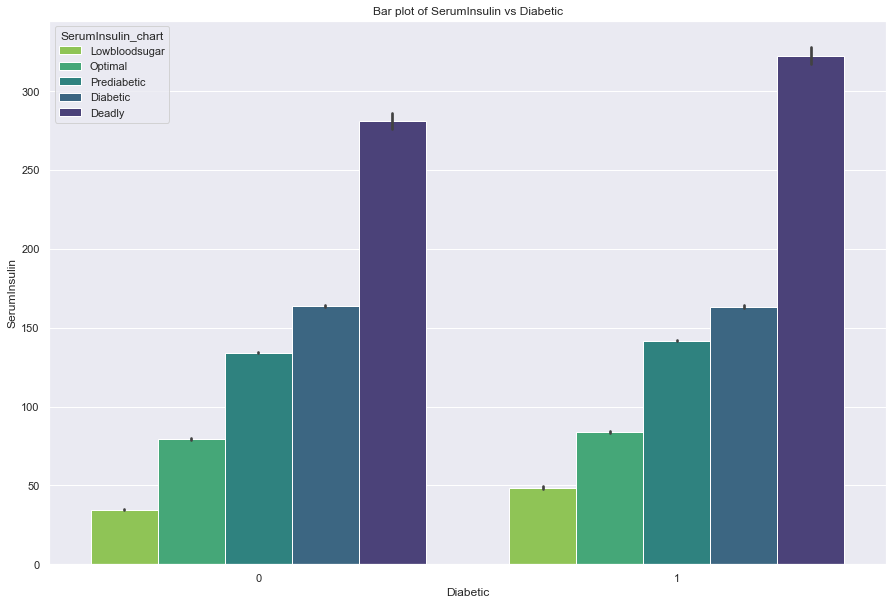

In [19]:
#data visualization of SerumInsulin vs Diabetic
plt.figure(figsize=(15,10))
sns.barplot(x="Diabetic", y="SerumInsulin",hue="SerumInsulin_chart",data=diabetes,palette="viridis_r")
plt.title("Bar plot of SerumInsulin vs Diabetic")

Text(0.5, 1.0, 'violin plot of PlasmaGlucose vs Diabetic attributes')

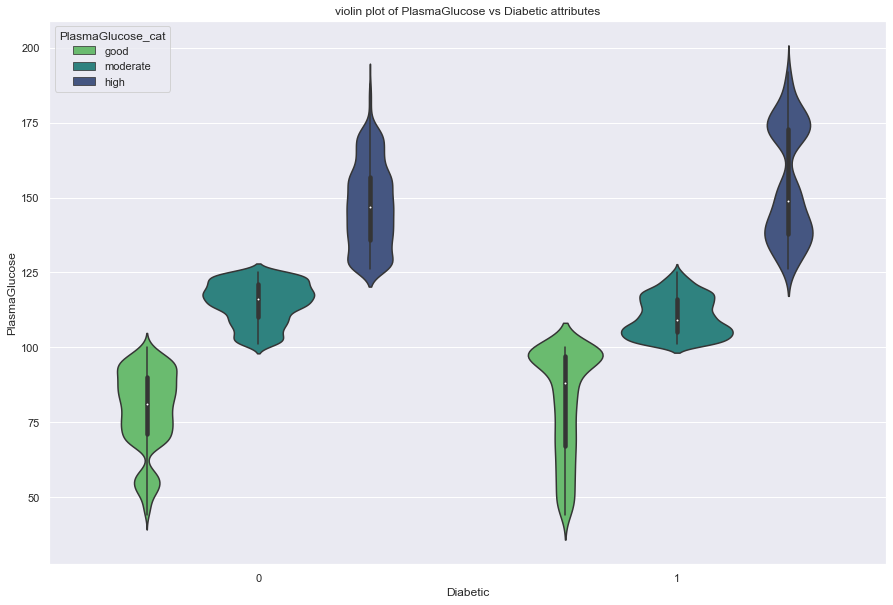

In [20]:
#data visualization of SerumInsulin vs Diabetic
plt.figure(figsize=(15,10))
sns.violinplot(x="Diabetic", y="PlasmaGlucose",hue="PlasmaGlucose_cat",data=diabetes,palette="viridis_r")
plt.title("violin plot of PlasmaGlucose vs Diabetic attributes")

Text(0.5, 1.0, 'Bar plot of Age vs Diabetic attributes')

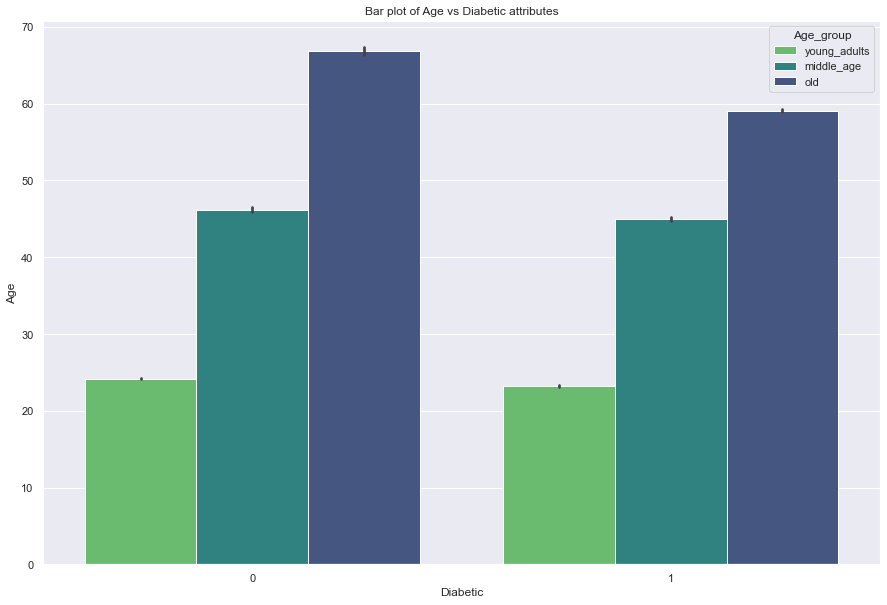

In [21]:
#data visualization of Age vs Diabetic
plt.figure(figsize=(15,10))
sns.barplot(x="Diabetic", y="Age",hue="Age_group",data=diabetes,palette="viridis_r")
plt.title("Bar plot of Age vs Diabetic attributes")

Text(0.5, 1.0, 'Bar plot of Age vs Diabetic attributes')

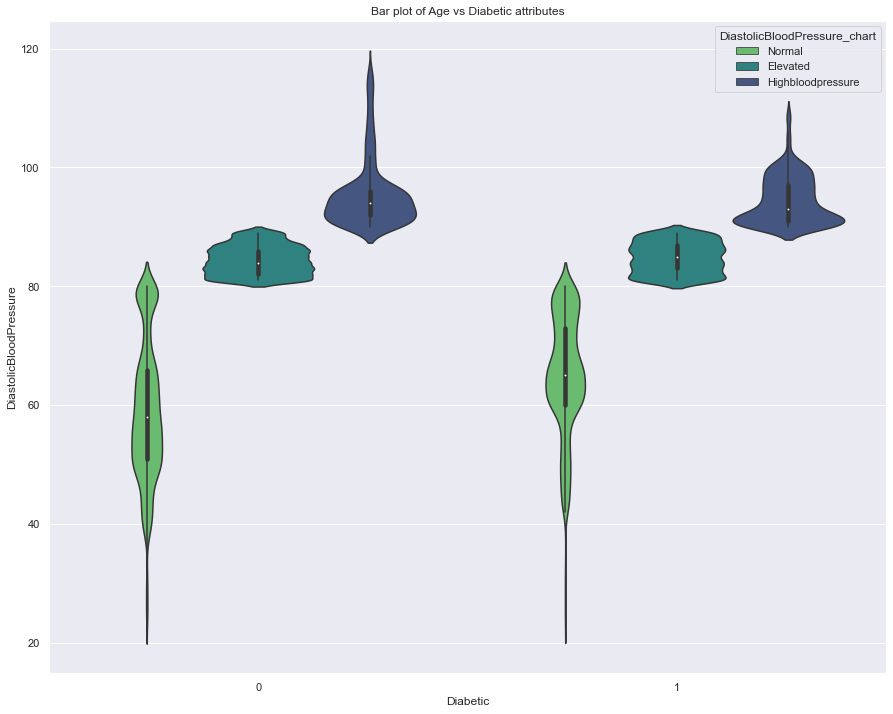

In [22]:
#data visualization of Age vs Diabetic
plt.figure(figsize=(15,12))
sns.violinplot(x="Diabetic", y="DiastolicBloodPressure",hue="DiastolicBloodPressure_chart",data=diabetes,palette="viridis_r")
plt.title("Bar plot of Age vs Diabetic attributes")

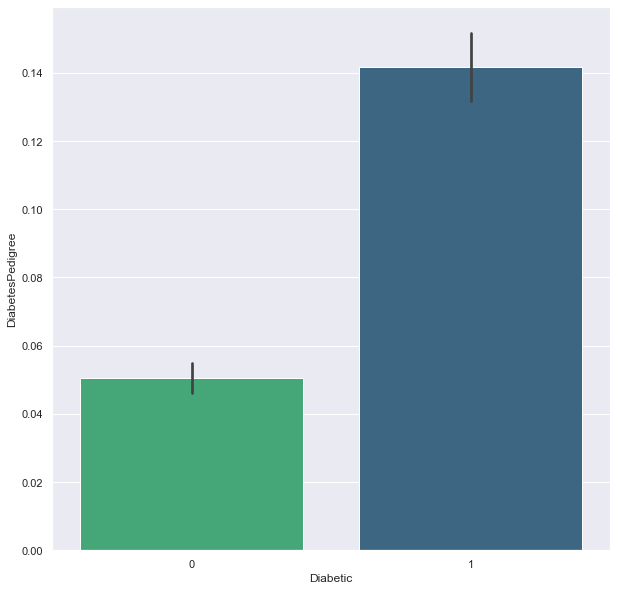

In [23]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x="Diabetic", y="DiabetesPedigree", data=diabetes_1,palette="viridis_r")
plt.show()

#### HANDLING OUTLIERS

<AxesSubplot:xlabel='Diabetic', ylabel='DiabetesPedigree'>

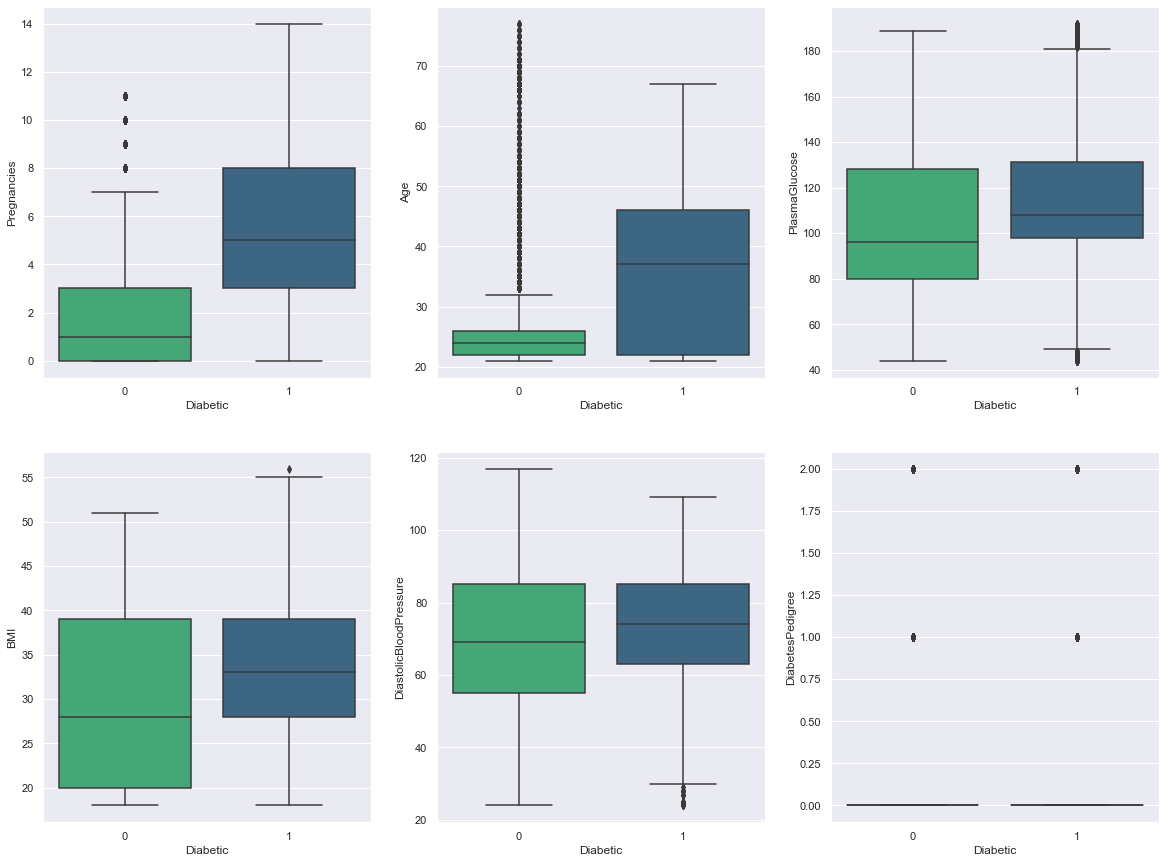

In [24]:
fig, axes = plt.subplots(2,3, figsize=(20, 15))

fig.suptitle('')

sns.boxplot(ax=axes[0, 0], data=diabetes, x="Diabetic", y='Pregnancies',palette="viridis_r")
sns.boxplot(ax=axes[0, 1], data=diabetes, x="Diabetic", y='Age',palette="viridis_r")
sns.boxplot(ax=axes[0, 2], data=diabetes, x="Diabetic", y='PlasmaGlucose',palette="viridis_r")
sns.boxplot(ax=axes[1, 0], data=diabetes, x="Diabetic", y="BMI",palette="viridis_r")
sns.boxplot(ax=axes[1, 1], data=diabetes, x="Diabetic", y="DiastolicBloodPressure",palette="viridis_r")
sns.boxplot(ax=axes[1, 2], data=diabetes, x="Diabetic", y="DiabetesPedigree",palette="viridis_r")


#### DETECTING OUTLIERS

In [25]:
#determine the interquantile range
Q1 = diabetes_1.quantile(0.25)
Q3 = diabetes_1.quantile(0.75)
IQR = Q3 - Q1
IQR

Pregnancies                 6.0
PlasmaGlucose              45.0
DiastolicBloodPressure     27.0
TricepsThickness           26.0
SerumInsulin              156.0
BMI                        18.0
DiabetesPedigree            0.0
Age                        13.0
Diabetic                    1.0
dtype: float64

In [26]:
(diabetes_1 < (Q1 - 1.5 * IQR)) |(diabetes_1> (Q3 + 1.5 * IQR))


Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0            False          False                   False             False   
1            False          False                   False             False   
2            False          False                   False             False   
3            False          False                   False             False   
4            False          False                   False             False   
...            ...            ...                     ...               ...   
14995        False          False                   False             False   
14996        False          False                   False             False   
14997        False          False                   False             False   
14998        False          False                   False             False   
14999        False          False                   False             False   

       SerumInsulin    BMI  DiabetesPedigree    Age  Diabetic  
0             False  False              True  False     False  
1             False  False             False  False     False  
2             False  False             False  False     False  
3             False  False              True  False     False  
4             False  False             False  False     False  
...             ...    ...               ...    ...       ...  
14995         False  False             False  False     False  
14996         False  False             False  False     False  
14997         False  False             False  False     False  
14998         False  False             False  False     False  
14999          True  False             False  False     False  

[15000 rows x 9 columns]

#### REMOVE OUTLIERS

In [27]:
diabetes_out = diabetes_1[~((diabetes_1< (Q1 - 1.5 * IQR)) |(diabetes_1 > (Q3 + 1.5 * IQR))).any(axis=1)]
diabetes_out.shape

(12358, 9)

In [28]:
diabetes_1=diabetes_out
diabetes_1.head()

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
1            8             92                      93                47   
2            7            115                      47                52   
4            1             85                      59                27   
5            0             82                      92                 9   
6            0            133                      47                19   

   SerumInsulin  BMI  DiabetesPedigree  Age  Diabetic  
1            36   21                 0   23         0  
2            35   41                 0   23         0  
4            35   42                 0   22         0  
5           253   19                 0   26         0  
6           227   21                 0   21         0

In [29]:
diabetes_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12358 entries, 1 to 14998
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Pregnancies             12358 non-null  int64
 1   PlasmaGlucose           12358 non-null  int64
 2   DiastolicBloodPressure  12358 non-null  int64
 3   TricepsThickness        12358 non-null  int64
 4   SerumInsulin            12358 non-null  int64
 5   BMI                     12358 non-null  int32
 6   DiabetesPedigree        12358 non-null  int32
 7   Age                     12358 non-null  int64
 8   Diabetic                12358 non-null  int64
dtypes: int32(2), int64(7)
memory usage: 868.9 KB


<AxesSubplot:xlabel='Diabetic', ylabel='DiabetesPedigree'>

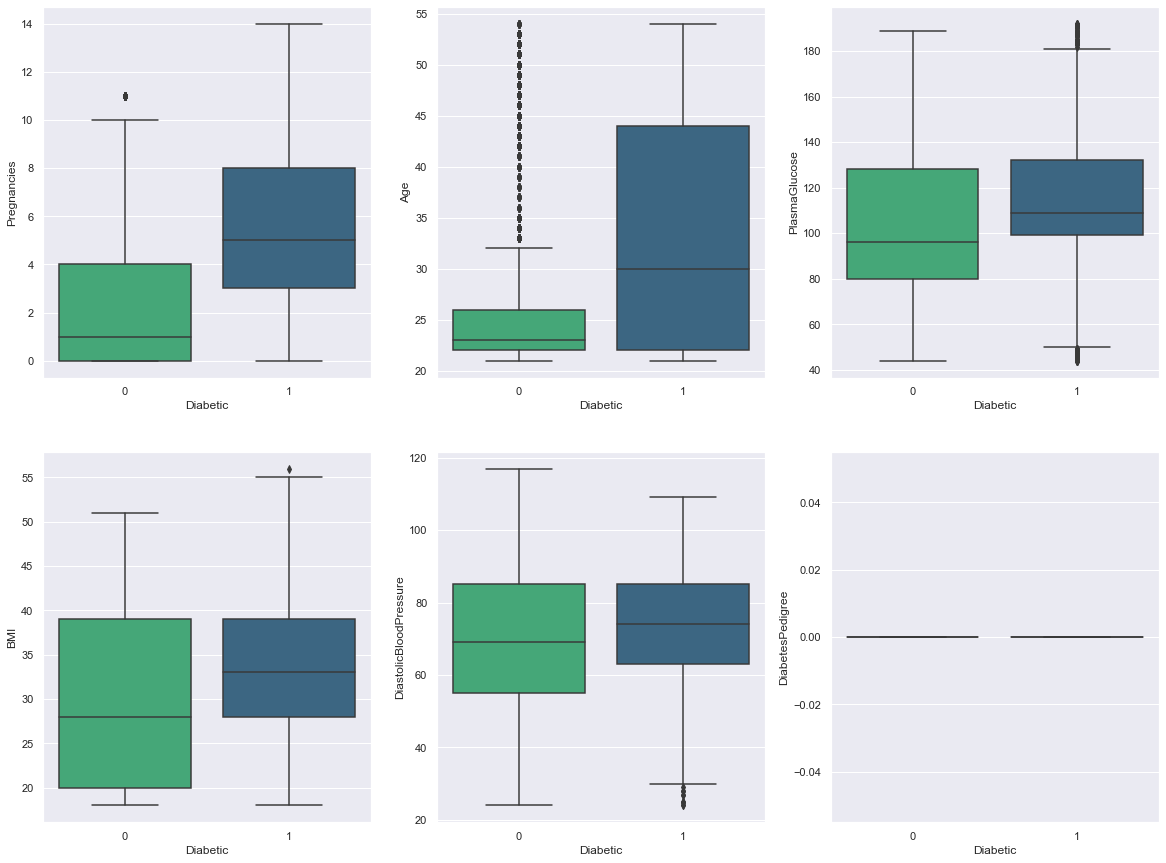

In [30]:
fig, axes = plt.subplots(2,3, figsize=(20, 15))

fig.suptitle('')

sns.boxplot(ax=axes[0, 0], data=diabetes_1, x="Diabetic", y='Pregnancies',palette="viridis_r")
sns.boxplot(ax=axes[0, 1], data=diabetes_1, x="Diabetic", y='Age',palette="viridis_r")
sns.boxplot(ax=axes[0, 2], data=diabetes_1, x="Diabetic", y='PlasmaGlucose',palette="viridis_r")
sns.boxplot(ax=axes[1, 0], data=diabetes_1, x="Diabetic", y="BMI",palette="viridis_r")
sns.boxplot(ax=axes[1, 1], data=diabetes_1, x="Diabetic", y="DiastolicBloodPressure",palette="viridis_r")
sns.boxplot(ax=axes[1, 2], data=diabetes_1, x="Diabetic", y="DiabetesPedigree",palette="viridis_r")

#### SEPARATING FEATURES FROM THE LABEL

In [31]:
#Create X (all the feature columns)
X= diabetes_1.drop("Diabetic", axis=1)#Features

# Create y (the target column)
Y= diabetes_1["Diabetic"]#labels
X.head()

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
1            8             92                      93                47   
2            7            115                      47                52   
4            1             85                      59                27   
5            0             82                      92                 9   
6            0            133                      47                19   

   SerumInsulin  BMI  DiabetesPedigree  Age  
1            36   21                 0   23  
2            35   41                 0   23  
4            35   42                 0   22  
5           253   19                 0   26  
6           227   21                 0   21

In [32]:
Y.head()

1    0
2    0
4    0
5    0
6    0
Name: Diabetic, dtype: int64

In [33]:
diabetes_1.shape

(12358, 9)

### FEATURE SCALING

In [34]:
scaler=StandardScaler()


In [35]:
scaler.fit(X)

StandardScaler()

In [36]:
standardized_data=scaler.transform(X)
print(standardized_data)

[[ 1.46969417 -0.48249464  1.29989545 ... -0.99021237  0.
  -0.53215359]
 [ 1.17247481  0.23516611 -1.4189578  ...  1.03733252  0.
  -0.53215359]
 [-0.61084134 -0.70091313 -0.70969173 ...  1.13870977  0.
  -0.64646731]
 ...
 [-0.31362198 -1.07534483 -0.29595319 ... -0.07781717  0.
   1.18255222]
 [-0.9080607  -0.451292    1.06347343 ... -1.2943441   0.
  -0.41783987]
 [-0.9080607   0.76561102  1.59542298 ... -1.19296686  0.
  -0.53215359]]


In [37]:
scaler.mean_

array([  3.05518692, 107.46326266,  71.00720181,  28.45905486,
       115.67624211,  30.76759994,   0.        ,  27.65520311])

In [38]:
scaler.scale_

array([ 3.36451839, 32.04856883, 16.91889767, 14.27595685, 96.20242592,
        9.86414657,  1.        ,  8.74785628])

#### SPLITTING THE DATA

In [39]:
#splitting the training and test data
from sklearn.model_selection import train_test_split
data = diabetes_1
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=42)

X_train.shape,X_test.shape, Y_train.shape, Y_test.shape

((8650, 8), (3708, 8), (8650,), (3708,))

## 3. MODEL  BUILDING

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [41]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()}

#### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
regression = LogisticRegression(max_iter = 1000)
regression.fit(X_train, Y_train )
y_pred =regression.predict(X_test)
print("Accuracy Score:",metrics.accuracy_score(Y_test, y_pred))
print("Train Accuracy:",regression.score(X_train,Y_train))
print("Test Accuracy:",regression.score(X_test,Y_test))



Accuracy Score: 0.8071736785329018
Train Accuracy: 0.8006936416184971
Test Accuracy: 0.8071736785329018


#### Decision Tree

In [43]:
from sklearn import tree
from sklearn.metrics import accuracy_score
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train,Y_train)
y_pred = decision_tree.predict(X_test)
print("Accuracy Score:",metrics.accuracy_score(Y_test, y_pred))
print("Train Accuracy:",decision_tree.score(X_train,Y_train))
print("Test Accuracy:",decision_tree.score(X_test,Y_test))


Accuracy Score: 0.901564185544768
Train Accuracy: 1.0
Test Accuracy: 0.901564185544768


#### Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print("Accuracy Score:",metrics.accuracy_score(Y_test, y_pred))
print("Train Accuracy:",clf.score(X_train,Y_train))
print("Test Accuracy:",clf.score(X_test,Y_test))


Accuracy Score: 0.9390507011866235
Train Accuracy: 1.0
Test Accuracy: 0.9390507011866235


#### K-Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)# Fit the classifier to the data
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
print("Accuracy Score:",metrics.accuracy_score(Y_test, y_pred))
print("Train Accuracy:",knn.score(X_train,Y_train))
print("Test Accuracy:",knn.score(X_test,Y_test))

Accuracy Score: 0.8460086299892126
Train Accuracy: 0.9186127167630058
Test Accuracy: 0.8460086299892126


####  RandomForestClassifier model,is the best of the 4,as it has the highest Accuracy percentage score

## 4. MODEL PERFOMANCE ANALYSIS

#### CLASSIFICATION REPORT AND CONFUSION MATRIX

[[2620   68]
 [ 158  862]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2688
           1       0.93      0.85      0.88      1020

    accuracy                           0.94      3708
   macro avg       0.94      0.91      0.92      3708
weighted avg       0.94      0.94      0.94      3708



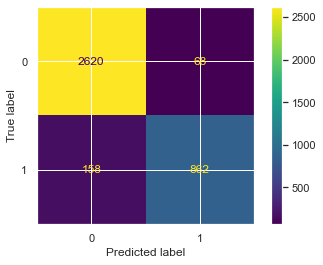

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test,y_pred, labels=clf.classes_)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

disp.plot()


#### ROC_CURVE

No handles with labels found to put in legend.


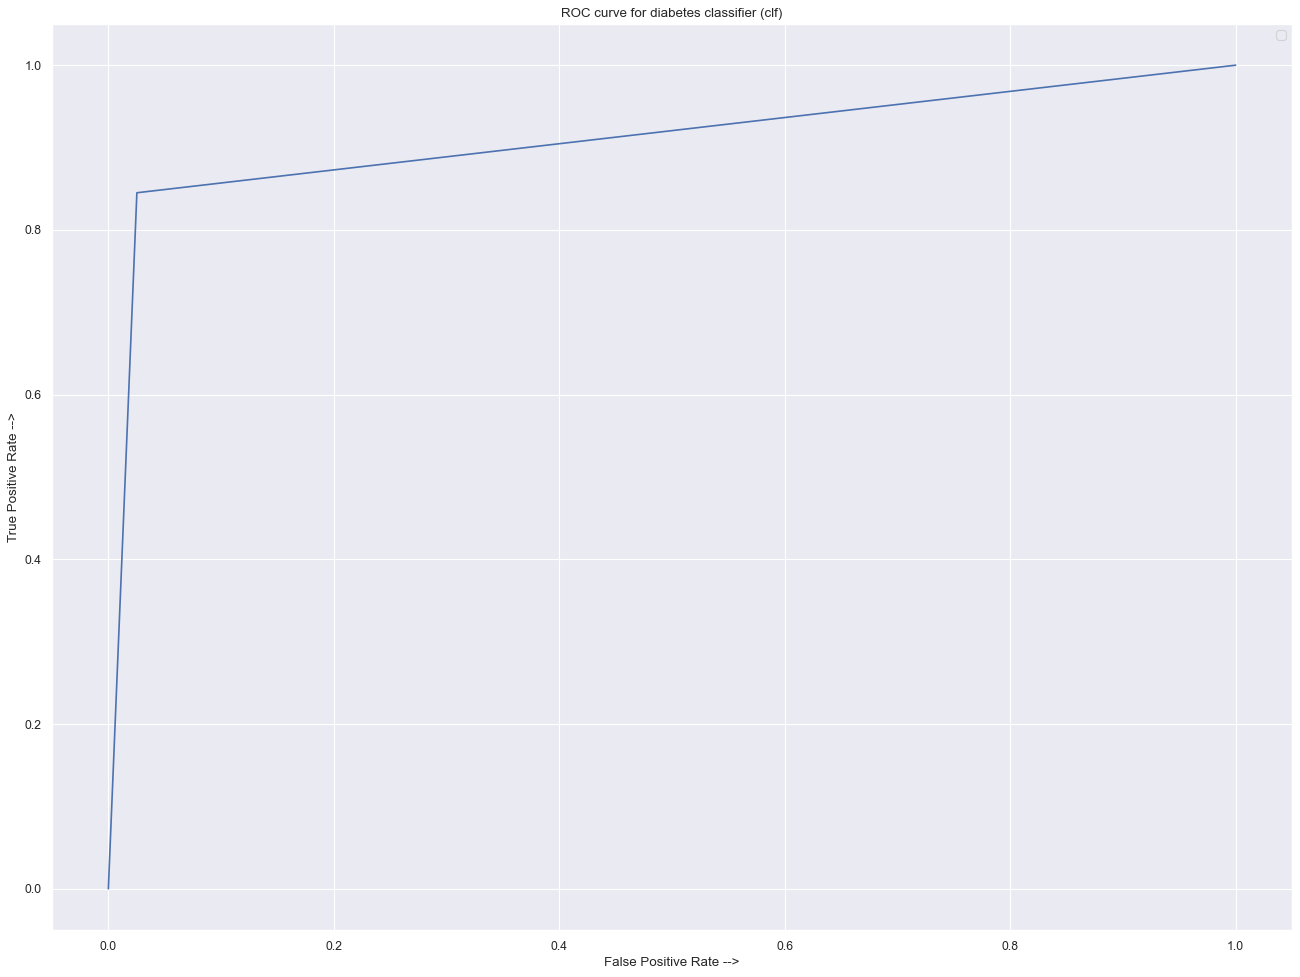

In [47]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
y_pred = clf.predict(X_test)
clf_fpr,clf_tpr, threshold = roc_curve(Y_test, y_pred)

plt.figure(figsize=(20,15), dpi=80)
plt.plot(clf_fpr, clf_tpr, linestyle='-',)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title("ROC curve for diabetes classifier (clf)")
plt.legend()

plt.show()

### FEATURE IMPORTANCE

In [48]:
clf.feature_importances_

array([0.29744027, 0.10277835, 0.06333773, 0.07150852, 0.14396955,
       0.16204751, 0.        , 0.15891807])

Features: 0, Score: 0.08031
Features: 1, Score: 0.14574
Features: 2, Score: 0.01712
Features: 3, Score: 0.02024
Features: 4, Score: 0.09528
Features: 5, Score: 0.09094
Features: 6, Score: 0.38908
Features: 7, Score: 0.16129


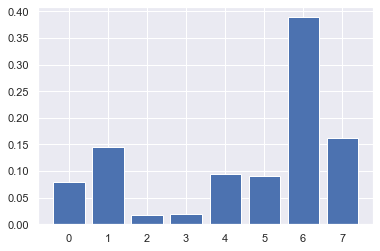

In [49]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
features,label = make_classification(n_samples=1000, n_features=8, n_informative=3, n_redundant=3, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(features,label)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,vi in enumerate(importance):
    print('Features: %0d, Score: %.5f' % (i,vi))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [50]:
import pickle
# Save trained model to file
y_pred = clf.predict(X_test)
pickle.dump(clf, open("Diabetes.pkl", "wb"))
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,Y_test)
clf.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

## PANDA PROFILING REPORT

In [51]:
from pandas_profiling import ProfileReport

In [52]:
profile = ProfileReport(diabetes)
profile

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]